                   Name  Jersey Number     Club    Position Nationality   Age  \
0            Bernd Leno            1.0  Arsenal  Goalkeeper     Germany  28.0   
1            Matt Macey           33.0  Arsenal  Goalkeeper     England  26.0   
2  Rúnar Alex Rúnarsson           13.0  Arsenal  Goalkeeper     Iceland  25.0   
3       Héctor Bellerín            2.0  Arsenal    Defender       Spain  25.0   
4        Kieran Tierney            3.0  Arsenal    Defender    Scotland  23.0   

   Appearances  Wins  Losses  Goals  ...  Punches  High Claims  Catches  \
0           64    28      16      0  ...     34.0         26.0     17.0   
1            0     0       0      0  ...      0.0          0.0      0.0   
2            0     0       0      0  ...      0.0          0.0      0.0   
3          160    90      37      7  ...      NaN          NaN      NaN   
4           16     7       5      1  ...      NaN          NaN      NaN   

   Sweeper clearances  Throw outs  Goal Kicks  Yellow cards  R

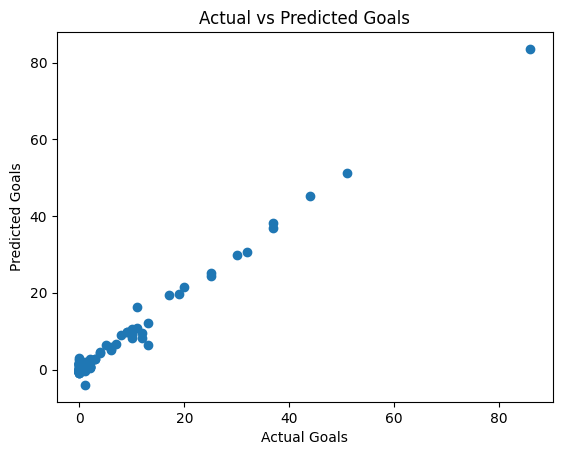

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(
    "/kaggle/input/premier-league-player-statistics-updated-daily/dataset - 2020-09-24.csv"
)

print(df.head())
print(df.info())

df.fillna(df.mean(numeric_only=True), inplace=True)

if 'player_name' in df.columns:
    df.drop('player_name', axis=1, inplace=True)

if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

target = 'Goals'  
X = df.drop(target, axis=1)
y = df[target]

X = X.select_dtypes(include='number')

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Goals")
plt.ylabel("Predicted Goals")
plt.title("Actual vs Predicted Goals")
plt.show()
